In [1]:
import networkx as nx
import numpy as np
import scipy as sc
import seaborn as sns
import os
import util
import re

In [2]:

def read_graphfile_viz(datadir, dataname, max_nodes=None, node_map=None):
    prefix = os.path.join(datadir, dataname, dataname)
    filename_graph_indic = prefix + '_graph_indicator.txt'
    graph_indic={}
    with open(filename_graph_indic) as f:
        i=1
        for line in f:
            line=line.strip("\n")
            graph_indic[i]=int(line)
            i+=1

    filename_nodes=prefix + '_node_labels.txt'
    node_labels=[]
    
#     node_map = get_node_map()
    print(f"node map: {node_map}")
    
    try:
        with open(filename_nodes) as f:
            for line in f:
                line=line.strip("\n")
#                 print(line)
#                 node_labels+=[int(line) - 1]
                # node_labels += node_map.get(line)
                node_labels += line
#         print(node_labels)
        num_unique_node_labels = len(set(node_labels))
    except IOError:
        print('No node labels')
 
    filename_node_attrs=prefix + '_node_attributes.txt'
    node_attrs=[]
    try:
        with open(filename_node_attrs) as f:
            for line in f:
                line = line.strip("\s\n")
                attrs = [float(attr) for attr in re.split("[,\s]+", line) if not attr == '']
                node_attrs.append(np.array(attrs))
    except IOError:
        print('No node attributes')
       
    label_has_zero = False
    filename_graphs=prefix + '_graph_labels.txt'
    graph_labels=[]

    label_vals = []
    with open(filename_graphs) as f:
        for line in f:
            line=line.strip("\n")
            val = int(line)
            if val not in label_vals:
                label_vals.append(val)
            graph_labels.append(val)

    label_map_to_int = {val: i for i, val in enumerate(label_vals)}
    graph_labels = np.array([label_map_to_int[l] for l in graph_labels])

    filename_adj=prefix + '_A.txt'
    adj_list={i:[] for i in range(1,len(graph_labels)+1)}    
    index_graph={i:[] for i in range(1,len(graph_labels)+1)}
    num_edges = 0
    with open(filename_adj) as f:
        for line in f:
            line=line.strip("\n").split(",")
            e0,e1=(int(line[0].strip(" ")),int(line[1].strip(" ")))
            adj_list[graph_indic[e0]].append((e0,e1))
            index_graph[graph_indic[e0]]+=[e0,e1]
            num_edges += 1
    for k in index_graph.keys():
        index_graph[k]=[u-1 for u in set(index_graph[k])]
    
    
    graphs=[]
    for i in range(1,1+len(adj_list)):
        G=nx.from_edgelist(adj_list[i])
        G.graph['label'] = graph_labels[i-1]
        for u in util.node_iter(G):
            if len(node_labels) > 0:
                # node_label_one_hot = { node_lbl: 0 for node_lbl in range(num_unique_node_labels)}
                node_label = node_labels[u-1]
                # node_label_one_hot[node_label] = 1
                util.node_dict(G)[u]['label'] = node_label
            if len(node_attrs) > 0:
                util.node_dict(G)[u]['feat'] = node_attrs[u-1]
        if len(node_attrs) > 0:
            G.graph['feat_dim'] = node_attrs[0].shape[0]
        # print(node_labels)
#         print(G.nodes())
#         print(G.edges())
        # print(G.get get_node_attribute('label'))
        # nx.draw(G, with_labels=True)
        
        mapping={}
        
        for n in util.node_iter(G):
            if node_map is not None:
                mapping[n]= f"{node_map.get(G.nodes[n]['label']) + '-' + str(n)}"
            else:
                mapping[n]= f"{G.nodes[n]['label']}"
    #         graphs.append(nx.relabel_nodes(G, mapping))
        graphs.append((G, mapping))

        # node_label_mapping = {}
#         nx.draw(G, labels = mapping, with_labels=True)
#         nx.draw(graphs[, labels = mapping, with_labels=True, node_size=1000)
    return graphs

## AIDS Dataset Analysis

The DTP AIDS Antiviral Screen has checked tens of thousands of compounds for evidence of anti-HIV activity. Available are screening results and chemical structural data on compounds that are not covered by a confidentiality agreement.

Screening Results (May 2004 Release)
The results of the screening tests are evaluated and placed in one of three categories:

CA - Confirmed active
CM - Confirmed moderately active
CI - Confirmed inactive


Chemical Structural Data - AIDS Screened (October 99 release)
The 2D structure (connection table) for each of the 42,390 compounds was retrieved from the DTP's Drug Information System. Conversion to a 3D structure was accomplished using the program Corina, created by Prof. Gasteiger's group.


In [3]:
def get_aids_node_map():
    activities = """0	C  
1	O  
2	N  
3	Cl 
4	F  
5	S  
6	Se 
7	P  
8	Na 
9	I  
10	Co 
11	Br 
12	Li 
13	Si 
14	Mg 
15	Cu 
16	As 
17	B  
18	Pt 
19	Ru 
20	K  
21	Pd 
22	Au 
23	Te 
24	W  
25	Rh 
26	Zn 
27	Bi 
28	Pb 
29	Ge 
30	Sb 
31	Sn 
32	Ga 
33	Hg 
34	Ho 
35	Tl 
36	Ni 
37	Tb"""

    node_map = {i.split('\t')[0].strip() : i.split('\t')[1].strip() for i in activities.split("\n")}

    return node_map

In [4]:
node_map = get_aids_node_map()
aids_graphs = read_graphfile_viz('./../dataset', dataname='AIDS', node_map = node_map)

node map: {'0': 'C', '1': 'O', '2': 'N', '3': 'Cl', '4': 'F', '5': 'S', '6': 'Se', '7': 'P', '8': 'Na', '9': 'I', '10': 'Co', '11': 'Br', '12': 'Li', '13': 'Si', '14': 'Mg', '15': 'Cu', '16': 'As', '17': 'B', '18': 'Pt', '19': 'Ru', '20': 'K', '21': 'Pd', '22': 'Au', '23': 'Te', '24': 'W', '25': 'Rh', '26': 'Zn', '27': 'Bi', '28': 'Pb', '29': 'Ge', '30': 'Sb', '31': 'Sn', '32': 'Ga', '33': 'Hg', '34': 'Ho', '35': 'Tl', '36': 'Ni', '37': 'Tb'}


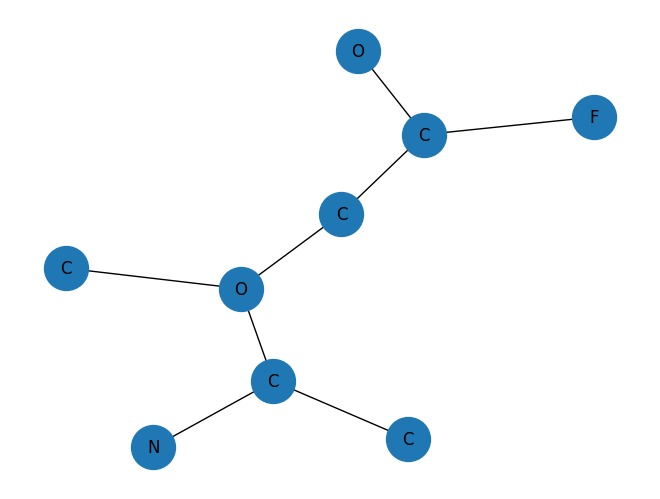

In [7]:
G = aids_graphs[28][0].copy()
labels = aids_graphs[28][1].copy()
only_labels = {k: v.split("-")[0] for k, v in labels.items()}
nx.draw_kamada_kawai(G, labels=only_labels, with_labels = True, node_size=1000)

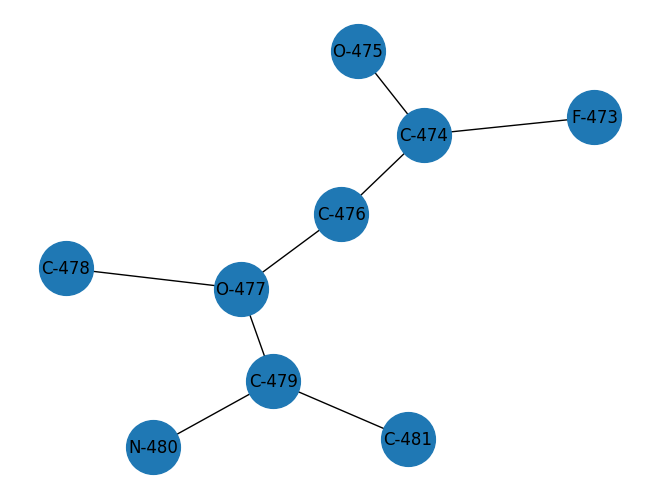

In [14]:
nx.draw_kamada_kawai(G, labels=labels, with_labels = True, node_size=1500)

### Node level features

In [11]:
for n1 in list(G.nodes(data=True)):
    print(n1)

(473, {'label': '4', 'feat': array([2.  , 0.  , 2.  , 0.25])})
(474, {'label': '0', 'feat': array([ 1.        ,  0.        ,  2.86599994, -0.25      ])})
(475, {'label': '1', 'feat': array([ 2.        ,  0.        ,  2.86599994, -1.25      ])})
(476, {'label': '0', 'feat': array([1.        , 0.        , 3.73210001, 0.25      ])})
(477, {'label': '1', 'feat': array([ 1.        ,  0.        ,  4.59810019, -0.25      ])})
(478, {'label': '0', 'feat': array([ 4.        ,  0.        ,  4.59810019, -1.25      ])})
(479, {'label': '0', 'feat': array([1.        , 0.        , 5.46409988, 0.25      ])})
(480, {'label': '2', 'feat': array([ 2.        ,  0.        ,  6.33010006, -0.25      ])})
(481, {'label': '0', 'feat': array([2.        , 0.        , 5.46409988, 1.25      ])})


### Graph Level Features

In [10]:
G.graph

{'label': 1, 'feat_dim': 4}

# Centrality Measures

It is used to measure the importance (or “centrality” as in how “central” a node is in the graph) of various nodes in a graph

- Degree
- Betweenness centrality - This metric defines and measures the importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
- Closeness centrality - 
- Eigenvector centrality - This metric measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

## Statistical Analysis

Create dataframes for centrality measures.
- Betweenness centrality
- Pagerank

In [43]:
import pandas as pd

only_labels = {k: v.split("-")[0] for k, v in get_aids_node_map().items()}
columns = list(only_labels.values())
df_values = np.zeros((len(aids_graphs), len(columns) + 1))

columns = ['glabel'] + columns

bet_df = pd.DataFrame(data=df_values, columns=columns)
page_df = pd.DataFrame(data=df_values, columns=columns)

i = 0
for G, labels in aids_graphs:
    
    g_label = G.graph['label']
    
    betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
#     try:
        
#         eigenvector_dict = nx.eigenvector_centrality(G, max_iter=600) # Run eigenvector centrality
#     except Exception:
#         pass
    
#     degree_dict = nx.degree(G)
    pageranks = nx.pagerank(G, max_iter=400)


    # Assign each to an attribute in your network
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
#     nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
#     nx.set_node_attributes(G, degree_dict, 'degree')
    nx.set_node_attributes(G, dict(pageranks), 'pagerank')
    
    graph0 = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
    
    only_labels = {k: v.split("-")[0] for k, v in labels.items()}
    
    graph0.reset_index(inplace=True)
    graph0['Atom'] = graph0['index'].apply(lambda z: only_labels.get(z))
    graph0.set_index('index', drop=True, inplace=True)
   
    df_centrality_measures = graph0.groupby('Atom').agg({'betweenness': np.mean, 'pagerank': np.mean}).reset_index()

    df_centrality_measures.set_index('Atom', drop=True, inplace=True)
    
    for j, row in df_centrality_measures.iterrows():
        bet_df.loc[i, j] = row['betweenness']
        page_df.loc[i, j] = row['pagerank']
        
    
    bet_df.loc[i, 'glabel'] = g_label
    page_df.loc[i, 'glabel'] = g_label

    i += 1

In [44]:
bet_df.head()

,glabel,C,O,N,Cl,F,S,Se,P,Na,...,Pb,Ge,Sb,Sn,Ga,Hg,Ho,Tl,Ni,Tb
0,0.0,0.023164,0.015771,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.123980,0.050941,0.088308,0.050664,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.115332,0.000000,0.102669,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.106117,0.056051,0.100566,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.073865,0.042365,0.058087,0.000000,0.033864,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: ylabel='C'>

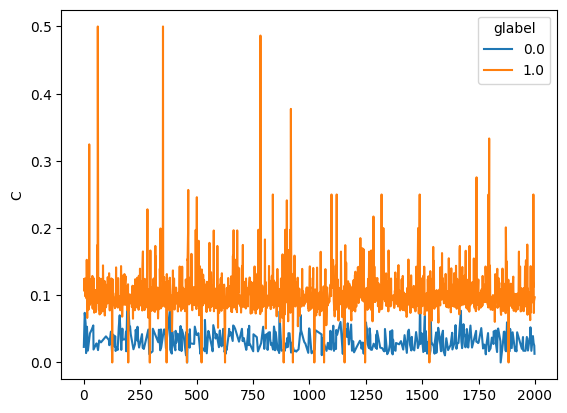

In [45]:
sns.lineplot(data= bet_df, x=bet_df.index, y='C', hue='glabel')

<AxesSubplot: ylabel='C'>

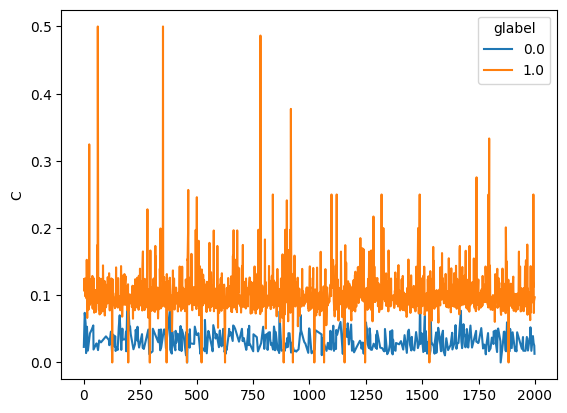

In [46]:
sns.lineplot(data= page_df, x=page_df.index, y='C', hue='glabel')

<AxesSubplot: ylabel='Na'>

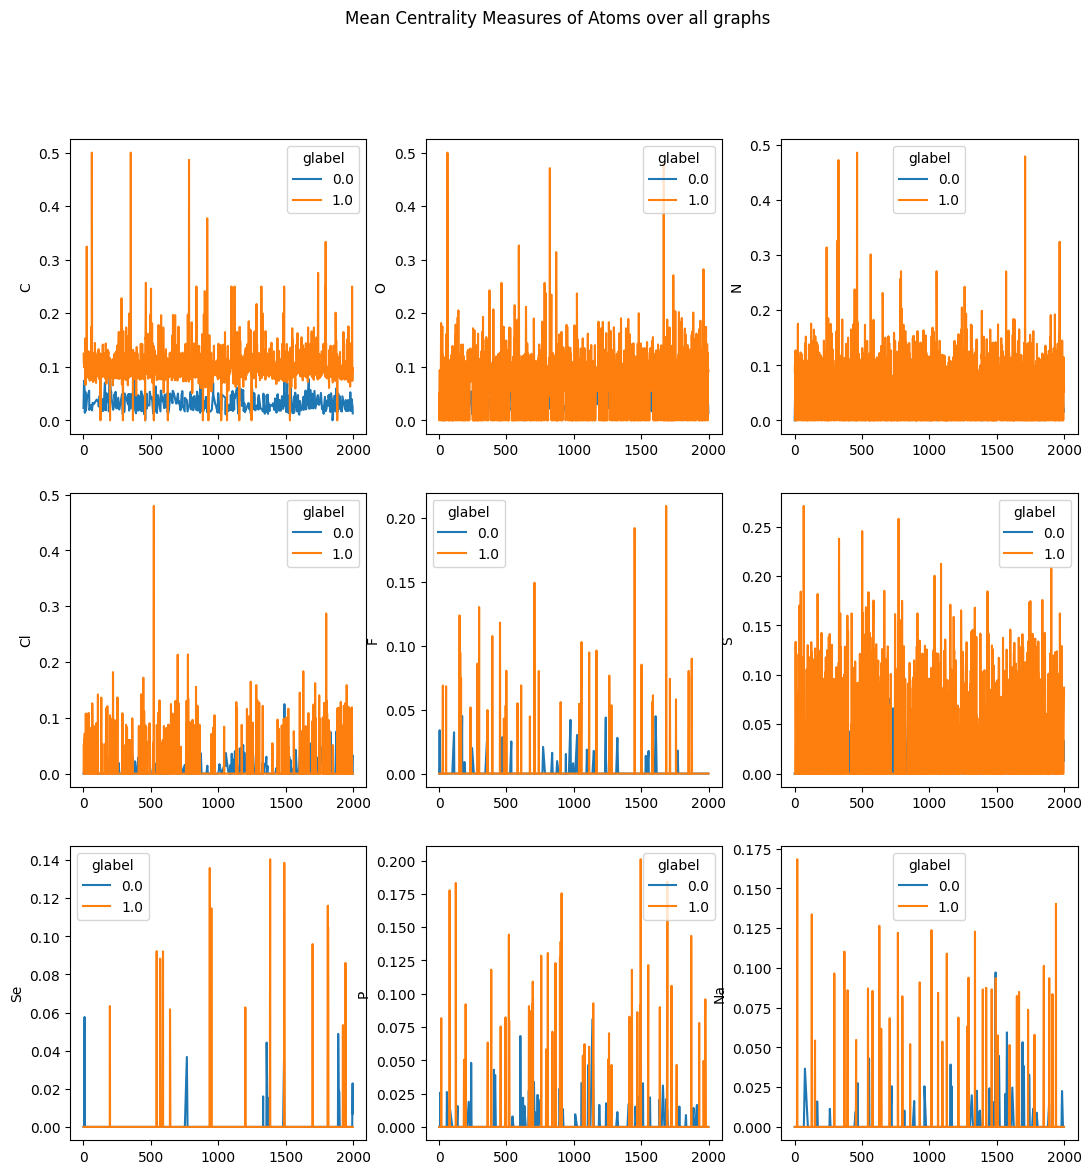

In [49]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(3, 3, figsize=(13,13))
fig.suptitle('Mean Centrality Measures of Atoms over all graphs')
# ax1.plot(x, y)
sns.lineplot(data= page_df, x=page_df.index, y='C', hue='glabel', ax=ax1[0, 0])
sns.lineplot(data= page_df, x=page_df.index, y='O', hue='glabel', ax=ax1[0, 1])
sns.lineplot(data= page_df, x=page_df.index, y='N', hue='glabel', ax=ax1[0, 2])
sns.lineplot(data= page_df, x=page_df.index, y='Cl', hue='glabel', ax=ax1[1, 0])
sns.lineplot(data= page_df, x=page_df.index, y='F', hue='glabel', ax=ax1[1, 1])
sns.lineplot(data= page_df, x=page_df.index, y='S', hue='glabel', ax=ax1[1, 2])
sns.lineplot(data= page_df, x=page_df.index, y='Se', hue='glabel', ax=ax1[2, 0])
sns.lineplot(data= page_df, x=page_df.index, y='P', hue='glabel', ax=ax1[2, 1])
sns.lineplot(data= page_df, x=page_df.index, y='Na', hue='glabel', ax=ax1[2, 2])

<AxesSubplot: ylabel='Na'>

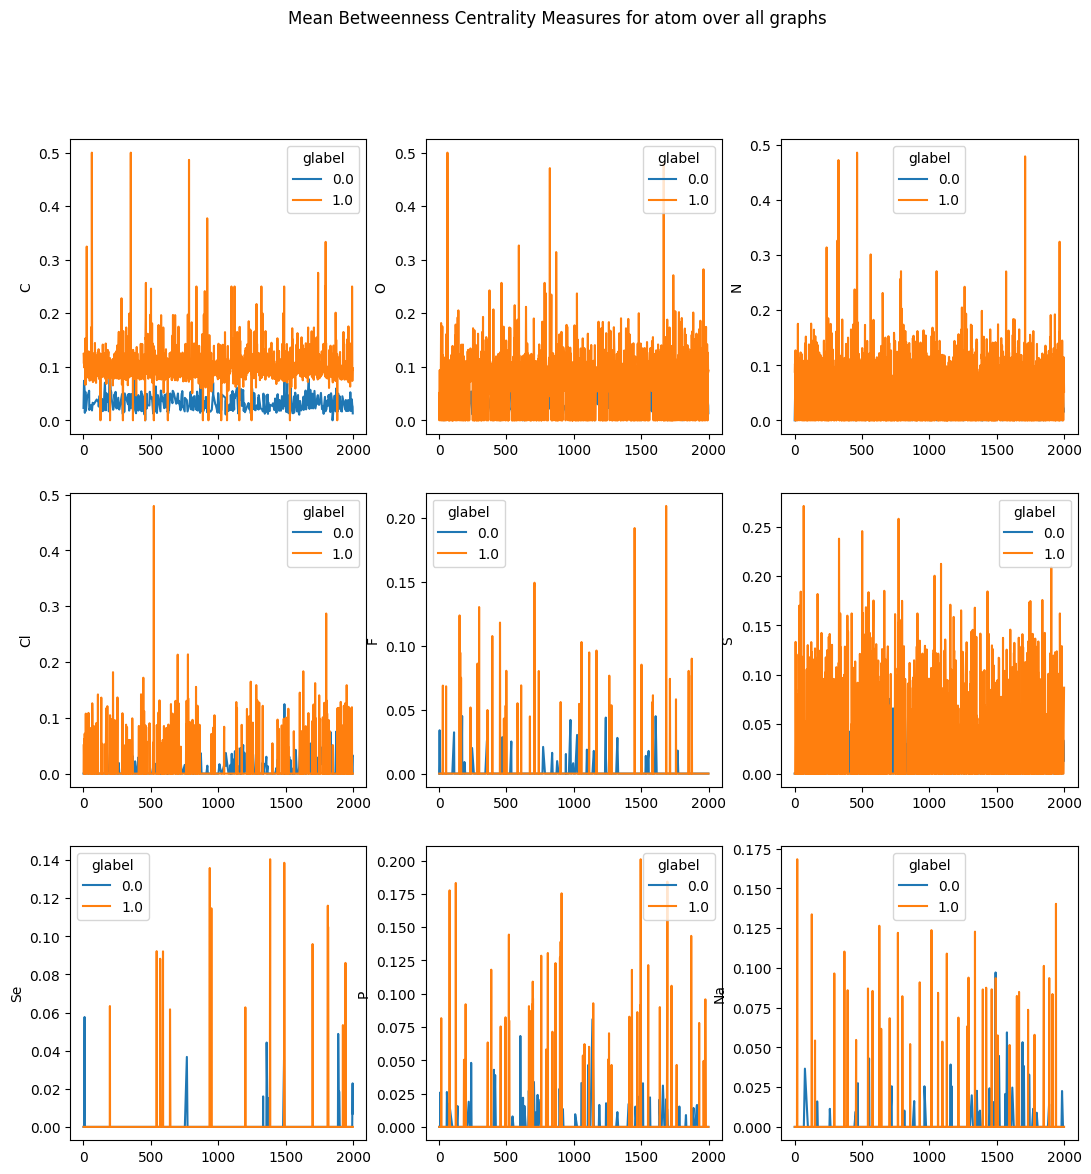

In [50]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(3, 3, figsize=(13,13))
fig.suptitle('Mean Betweenness Centrality Measures for atom over all graphs')
# ax1.plot(x, y)
sns.lineplot(data= bet_df, x=bet_df.index, y='C', hue='glabel', ax=ax1[0, 0])
sns.lineplot(data= bet_df, x=bet_df.index, y='O', hue='glabel', ax=ax1[0, 1])
sns.lineplot(data= bet_df, x=bet_df.index, y='N', hue='glabel', ax=ax1[0, 2])
sns.lineplot(data= bet_df, x=bet_df.index, y='Cl', hue='glabel', ax=ax1[1, 0])
sns.lineplot(data= bet_df, x=bet_df.index, y='F', hue='glabel', ax=ax1[1, 1])
sns.lineplot(data= bet_df, x=bet_df.index, y='S', hue='glabel', ax=ax1[1, 2])
sns.lineplot(data= bet_df, x=bet_df.index, y='Se', hue='glabel', ax=ax1[2, 0])
sns.lineplot(data= bet_df, x=bet_df.index, y='P', hue='glabel', ax=ax1[2, 1])
sns.lineplot(data= bet_df, x=bet_df.index, y='Na', hue='glabel', ax=ax1[2, 2])